# 📊 2. Análisis Exploratorio 
## Introducción
En estadistica, existen cuatro conceptos fundamentales que cualquier persona que vaya realizar algún estudio estadistico, llamese: analista, científico de datos, ingeniero,etc, deberá tener en cuenta. Estos conceptos son: **centro**, **variación**, **desviación** y **valores extremos**. 
Estos cuatro conceptos hacen parte de un buen análisis exploratorio de datos. Además, asociaremos a estos 4 conceptos, la palabra **Realizar estadística**. 
Así que, un buen análisis exploratorio siempre lleva a descubrir cuál es el centro de los datos, cómo varían esos datos del centro, qué tanto se desvían del centro, y cómo podemos detectar valores extremos. En esta sección, utilizaremos algunas herramientas de visualización tales como diagramas de dispersión y de caja para poder analizar cómo se comportan nuestros datos y qué patrones podemos detectar. 

```{admonition} Objetivos
:class: tips
- Realizar estadisticas con el conjunto de datos
- Identificar patrones en tiempos de espera vs el volumen de llamadas entrantes.
- Analizar si existe una tendencia lineal entre esas dos variables.
- Visualizar distribución mediante un analisis gráfico de dispersión
```

## 2.1 Cargamos nuestro dataset
Recordemos que nuestro dataframe lo habiamos guardado con el nombre *new_df*. Por lo tanto, lo llamamos con la función de pandas *pd.read_csv*. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

#Carga de nuetro dataset de estudio


# Leer el archivo CSV
new_df = pd.read_csv("datos_call_center.csv")
new_df


,Llamadas entrantes,Tiempo de espera promedio (Segundos)
0,217,165
1,200,415
2,216,230
3,155,192
4,37,35
...,...,...
1223,191,116
1224,212,105
1225,210,232
1226,167,162


### 2.2 Estadísticas del Dataframe
El siguiente código nos permite ver los valores máximos y mínimos de las dos columna de nuestro dataframe, así como también su media, desviación estandar y sus repectivos cuartiles.

In [2]:
# Aplicar describe() y redondear a dos decimales
estadisticas = new_df.describe().round(2)
print(estadisticas)


       Llamadas entrantes  Tiempo de espera promedio (Segundos)
count             1228.00                               1228.00
mean               196.69                                228.07
std                152.36                                179.56
min                  5.00                                  3.00
25%                122.75                                117.75
50%                177.00                                182.00
75%                233.00                                276.00
max               1575.00                               1551.00


### 2.3 Resultados de las estadísticas
Observemos que el promedio de llamadas entrantes es de aproximadamente 197, el número de  llamadas entrantes se desvían en aproximadamente 152 llamadas del promedio de llamadas entrantes. Por otro lado, el promedio de tiempo de espera, (en segundos) es de 228 y tenemos una desviación del promedio de espera de aproximadamente de 180 segundos de espera.  
Tenemos un máximo de 1575 llamadas y un máximo de espera de 1551 segundos. 

In [3]:
# Cuantiles básicos (25%, 50%, 75%) con describe()
# Calcular los cuantiles para cada columna numérica
cuantiles = new_df.quantile([0.25, 0.50, 0.75])

print("Cuantiles específicos (25%, 50%, 75%):")
print(cuantiles)
# Calcular IQR (Rango Intercuartílico)
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers inferiores y superiores
outliers_superiores = new_df[(new_df > (Q3 + 1.5 * IQR)).any(axis=1)]
outliers_inferiores = new_df[(new_df < (Q1 - 1.5 * IQR)).any(axis=1)]

print("Valores extremos superiores:")
print(outliers_superiores)

print("Valores extremos inferiores:")
print(outliers_inferiores)


Cuantiles específicos (25%, 50%, 75%):
      Llamadas entrantes  Tiempo de espera promedio (Segundos)
0.25              122.75                                117.75
0.50              177.00                                182.00
0.75              233.00                                276.00


Valores extremos superiores:
      Llamadas entrantes  Tiempo de espera promedio (Segundos)
41                   137                                   587
183                  483                                   525
184                  547                                   234
221                  414                                   332
234                  229                                   639
...                  ...                                   ...
1106                 452                                   232
1125                 424                                   221
1171                 627                                   320
1173                 599                                   290
1207                 203                                   514

[110 rows x 2 columns]
Valores extremos inferiores:
Empty DataFrame
Columns: [Llamadas entrantes, Tiempo de espera promedio (Segundos)]
Index: []


### 2.4 Análisis visual de valores extremos con diagramas de caja
Los diagramas de cajas, son una herramienta esencial en cualquier análisis exploratorio de datos. Ellos nos permiten visualizar hacia donde se centran los datos, el nivel de su desviación y qué tan alejados están algunos datos del promedio. 

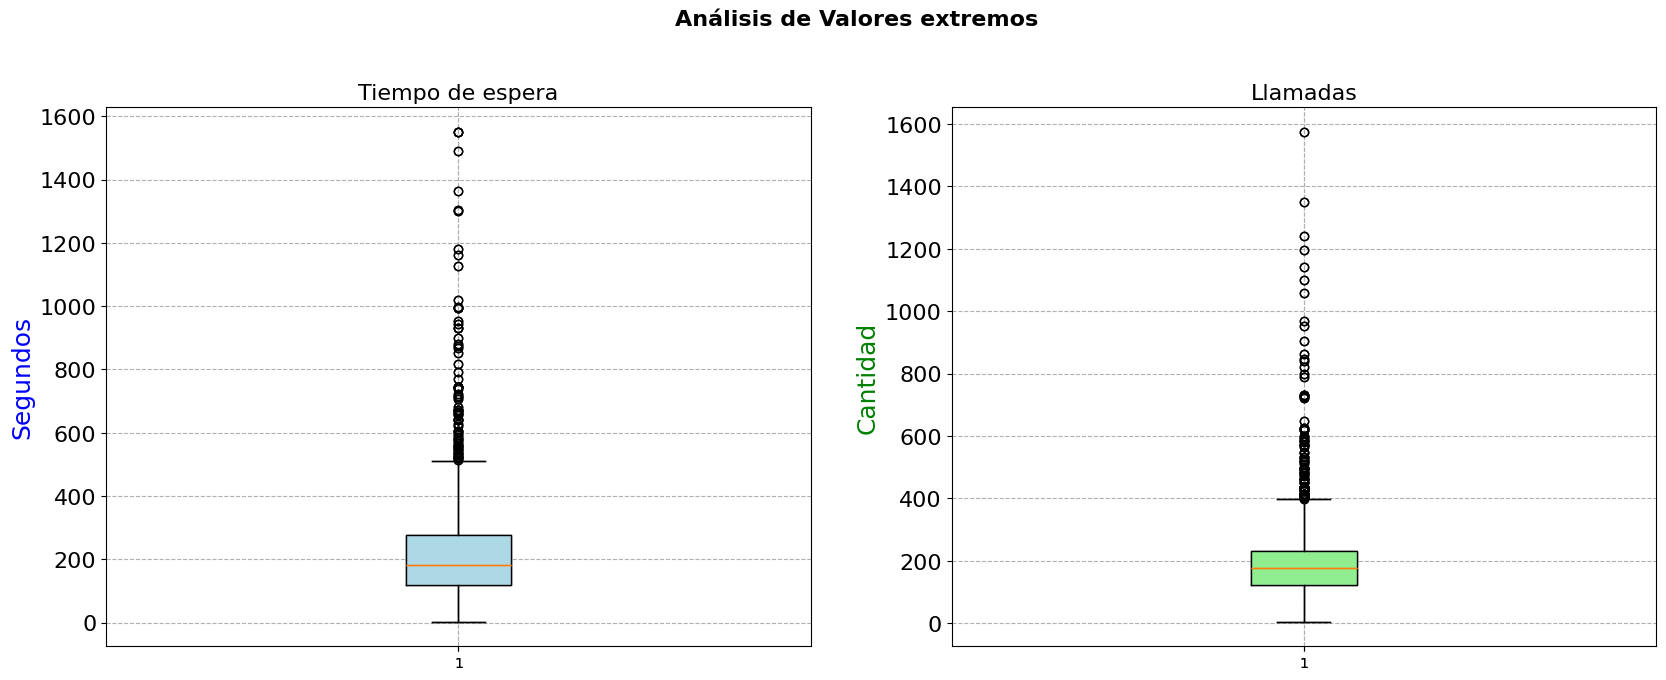

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

x1 = new_df["Tiempo de espera promedio (Segundos)"]
y1 = new_df["Llamadas entrantes"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle('Análisis de Valores extremos', fontsize=16, fontweight='bold', y=1.02)

# Configurar etiquetas de los ejes Y el  tamaño de fuente
ax1.set_ylabel("Segundos", color="b", fontsize=18)  
ax2.set_ylabel("Cantidad", color="green", fontsize=18)

# Configurar tamaño de los números del eje Y
ax1.tick_params(axis='y', labelsize=16)  
ax2.tick_params(axis='y', labelsize=16)

# Crear los boxplots
ax1.boxplot(x1)
ax1.set_title("Tiempo de espera", fontsize=16)
ax1.grid(linestyle='--')
ax2.boxplot(y1)
ax2.set_title("Llamadas", fontsize=16)
ax2.grid(linestyle='--')

box1 = ax1.boxplot(x1, patch_artist=True)  
box2 = ax2.boxplot(y1, patch_artist=True)

for box in box1['boxes']:
    box.set_facecolor("lightblue")  # Color para el primer gráfico

for box in box2['boxes']:
    box.set_facecolor("lightgreen")  # Color para el segundo gráfico

plt.show()

```{admonition} Observación
:class: note
Note que en los graficos de caja y bigote que se muestran, hay una cantidad considerable de **valores extremos** ; sin embargo, en el contexto de los call center, esto es un fenomeno común debido al factor de otras variables no controlables, como la caida del sistema, el tamaño del call center y el tipo de servicio que se presta el call center. Por ejemplo: en **soporte técnico** es comúm tener un flujo de llamadas bastante alto.
```

### 2.4 Diagrama de dispersión
El diagrama de dispersión nos permite ver relaciones y detectar algunos **patrones** entre las dos variables. En este estudio tomaremos como
* variable independiente $X =$ **Número de llamadas entrantes** 
* Variable dependiente $Y=$ **Tiempo de espera promedio (Segundos)**  

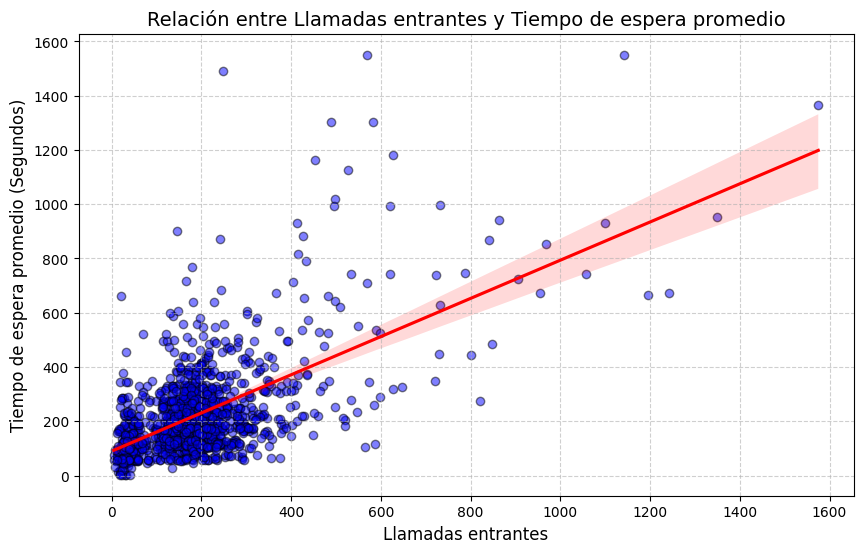

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asumiendo que tus datos están en new_df
x1 = new_df["Llamadas entrantes"]
y1 = new_df["Tiempo de espera promedio (Segundos)"]

# Crear el gráfico de dispersión con regresión lineal
plt.figure(figsize=(10, 6))
sns.regplot(x=x1, y=y1, scatter_kws={'alpha': 0.5, 'color': 'blue','edgecolor':'black'}, line_kws={'color': 'red'})

# Personalizar el gráfico
plt.title("Relación entre Llamadas entrantes y Tiempo de espera promedio", fontsize=14)
plt.xlabel("Llamadas entrantes", fontsize=12)
plt.ylabel("Tiempo de espera promedio (Segundos)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()

Del gráfico anterior, podemos observar algún patrón o tendencia lineal positiva. Es decir, una tendencia lineal creciente.  Sin embargo, necesitamos cuantificar y medir este patrón, lo cuál se hará con una medida muy conocida, llamada:  **coeficiente de correlación lineal**.

### 2.5 Coeficiente de correlación
Necesitamos medir la **fuerza**  de relación que existe entre nuestras variables de estudio. Por lo tanto, una manera de medir dicha fuerza, es utilizando el **coeficiente de correlación**. Esta fuerza, puede medirse en la siguientes escalas no negativas: 
* $0< r \leq 0.3$ **Correlación débil o nula**
* $ 0.3 < r < 0.7$ **Correlación moderada**  
* $0.7 \leq r \leq 1$ **Correlación fuerte**


El siguiente código nos permite hallar el coeficiente de correlación entre $X$ y $Y$

In [6]:
correlacion = new_df["Llamadas entrantes"].corr(new_df["Tiempo de espera promedio (Segundos)"])
print(f"Correlación: {correlacion:.2f}")  # Si > 0.7, relación fuerte.

Correlación: 0.60


Como podemos observar en el resultado anterior, el coeficiente de correlación $r$ es de $0.6$ lo que indica un grado de correlación moderada. 

### 2.6 Valores extremos
El siguiente código nos permite visualizar más clararamente, una separación entre colores azul claro y amarillo los cuales representan **valores normales** y **valores extremos** respectivamente.

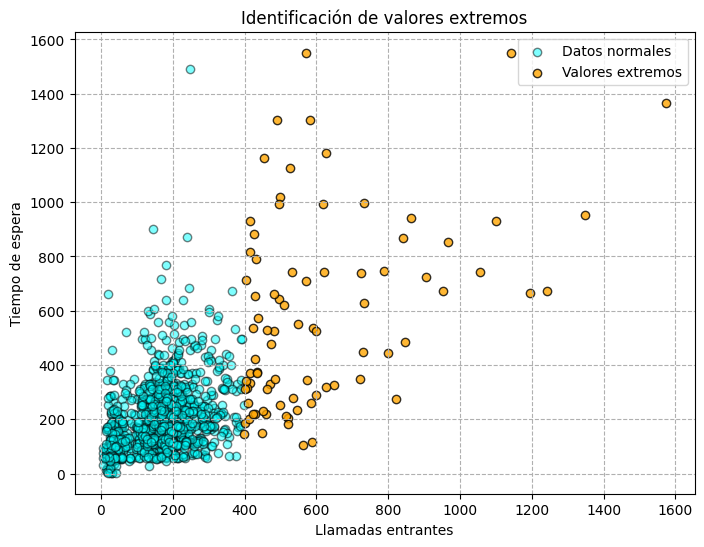

In [7]:
import matplotlib.pyplot as plt

# Calcular los cuantiles y el rango intercuartílico (IQR)
Q1 = x1.quantile(0.25)
Q3 = x1.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers (fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR])
outliers = (x1 < (Q1 - 1.5 * IQR)) | (x1 > (Q3 + 1.5 * IQR))

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Graficar los datos normales (no outliers) en cian
plt.scatter(x1[~outliers], y1[~outliers], color="cyan", edgecolor="black", alpha=0.5, label="Datos normales")

# Graficar los outliers en naranja
plt.scatter(x1[outliers], y1[outliers], color="orange", edgecolor="black", alpha=0.8, label="Valores extremos")

# Agregar una línea de tendencia (opcional)


# Configurar el gráfico
plt.title("Identificación de valores extremos")
plt.xlabel("Llamadas entrantes")
plt.ylabel("Tiempo de espera")
plt.legend()
plt.grid(linestyle='--')

# Mostrar el gráfico
plt.show()

```{admonition} Para tener en cuenta
:class: warning
Del gráfico anterior, podriamos hacernos la siguiente  pregunta: ¿Debería preocuparnos los valores extremos?. La respuesta a esta pregunta, está influenciada por algunos factores a tomar en cuenta, tales como: el contexto de estudio, el tamaño del call-center, horas pico, promociones en días de campaña. Sin embargo, de la observación anterior podemos notar que si los valores extremos siguen la misma tendencia al conjunto de datos normales, entonces no será necesario considerarlos como **errores**, ya que podrían aportarnos información valiosa. 
```

### 2.7 La prueba de significancia de la pendiente

Antes de hacer la prueba de la significancia, debemos definir lo que significa una relación lineal entre dos variables. 

**Definición**
Se dice que existe una regresión lineal entre dos variables continuas $X$ y $Y$ si existen constantes $\beta_{1}$ y $\beta_{0}$ tales que: 

```{math}
:class: my-math
  Y= \beta_{1}X+ \beta_{0}  

```

Por lo tanto, el objetivo de nuestro estudio  de la relación lineal entre $X$ y $Y$ se reduciría al de  probar las siguientes hipótesis de una cola:

```{math}
:class: my-math
  H_{0}:  \beta_{1} =0  \\ 
  H_{1}: \beta_{1} > 0 
```

donde 
* $H_{0}:\beta_{1}=0$ significa que **no existe relación lineal** entre $X$ y $Y$ 
* $H_{1}:\beta_{1}>0$ significa **existe una relación lineal positiva** entre $X$ e $Y$.

Para la prueba estadistica, usamos el estadistico $ t=  \frac{\beta_{1}}{S_{\beta_{1}}}$, que sigue una distribución t-student con $n-2$ grados de libertad,  donde:

* $S_{\beta_{1}}= \frac{s}{\sqrt{S_{xx}}}$

* $s = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\widehat{y_{i}})}{n-2}}$

* $SS_{xx} = n\sum_{i=1}^{n}x_{i}^{2} - (\sum_{i=1}^{n}x_{i})^{2}$

Ya que la muestra es suficientemente grande, $n=1228 > 30$, la distribución del estadistico $t$ puede aproximarse a una distribución normal. Por lo tanto, para $n>30$, tenemos que $t_{\alpha , n-2}$ $\thickapprox  z_{\alpha}$.





### Nivel de confianza 
Para un nivel de confianza del 95%, elegimos $\alpha = 0.05$

### Criterios de rechazo
La hipótesis nula, $H_{0}$ se rechaza si el valor $p < 0.05 $ y el estadistico $t$ es positivo o tenemos $t > z_{0.05}$. 

### Recta de mejor ajuste
De la libreria *scipy* buscamos un modelo de regresión lineal simple y ajustamos el modelo a los datos.

In [8]:
import numpy as np
from scipy.stats import t

# 
x1 = new_df["Llamadas entrantes"].values  # Variable independiente
y1 = new_df["Tiempo de espera promedio (Segundos)"].values  # Variable dependiente
n = len(x1)  # Tamaño de la muestra (1228)

# 1. Ajustar el modelo de regresión lineal
beta1, beta0 = np.polyfit(x1, y1, deg=1)  # beta1 = pendiente, beta0 = intercepto

### Errores
Calculamos los diferentes errores $s$, $SSE$, $SS_{xx}$ y $S_{\beta_{1}}$.

In [9]:
# 2. Calculamos SSxx (Suma de Cuadrados de X)
x_mean = np.mean(x1)
SSxx = np.sum((x1 - x_mean) ** 2)  # ¡Notación corregida!

# 3. Calculamos residuos y Suma de Cuadrados de los Errores (SSE)
y_hat = beta0 + beta1 * x1
residuos = y1- y_hat
SSE = np.sum(residuos ** 2)  # Suma de cuadrados de los residuos

# 4. Error estándar de los residuos (s)
s_squared = SSE / (n - 2)  # Varianza residual
s = np.sqrt(s_squared)  # Error estándar de estimación

# 5. Error estándar de la pendiente (SE_beta1)
SE_beta1 = s / np.sqrt(SSxx)  # Usando SSxx

### Estadístico
Hallamos el estadistico $t$ de una sola cola e imprimimos los resultados.

In [10]:
# 6. Estadístico t y p-valor
t_estadistico = beta1 / SE_beta1
p_valor_unilateral = 1 - t.cdf(t_estadistico, df=n-2)  # Solo cola derecha

# Resultados
print(f"Pendiente (β1): {beta1:.4f}")
print(f"SSxx: {SSxx:.4f}")  # 
print(f"Error estándar de los residuos (s): {s:.4f}")
print(f"Error estándar de la pendiente (SE_β1): {SE_beta1:.4f}")
print(f"Estadístico t: {t_estadistico:.4f}")
print(f"p-valor: {p_valor_unilateral:.4f}")

Pendiente (β1): 0.7040
SSxx: 28484736.8730
Error estándar de los residuos (s): 144.0668
Error estándar de la pendiente (SE_β1): 0.0270
Estadístico t: 26.0797
p-valor: 0.0000


### Resultados
De los cálculos anteriores tenemos que: 
* El estadistico $t=26.07 > z_{0.05} = 1.641$
* El valor $p < 0.05$  


Por lo tanto, rechazamos la hipótesis nula y concluimos que si hay significancia en la pendiente $\beta_{1}$.

### 2.8 Interpretación de los resultados
Del análisis anterior, observe que la pendiente $\beta_{1}$ es estadisticamente **significativa** (0.70), por lo que, sí existe una relación lineal positiva entre las variables. Sin embargo, observe que el coeficiente de $R^{2}$  es de 0.36, lo que significa que nada más el 36% de la variación lineal de $Y$ está explicada por la relación lineal entre $X$ y $Y$. Es decir, solo el 36% puede ser explicado por dicha relación, y el otro 64% se debe a la influencia de otros factores o variables no considerados. 

```{admonition} Advertencia
:class: warning
La correlación no implica causalidad. Es decir, la ocurrencia de una no implica necesariamnte la causa de la otra. Y esto se demuestra en la interpretación de los resultados, donde la proporción lineal explicada  es apenas del 36%. Es decir, el 64% restante que no es explicado por la relación lineal entre el número de llamadas y el tiempo de espera, viene explicado por otras variables que no se consideraron en el estudio.  
``` 

### 2.9 Conclusiones
La correlación lineal mostrada $r=0.6$, indica que hay una relación lineal moderada positiva entre el número de llamadas y el tiempo de espera. Lo que significa que a mayor número de llamadas, posiblemente aumente el tiempo de espera del cliente. 

El ($R^2 = 0.36$) muestra que el modelo captura el 36% de la variabilidad en el tiempo de espera promedio. Esto indica que, aunque el volumen de llamadas influye en los tiempos de espera, hay otros factores no incluidos en el análisis que afectan este indicador



### 2.10 Recomendaciones 



```{admonition} **Importante**  
:class: hint  
* Implementar estrategias para manejar los períodos de alta demanda, como ajustar la cantidad de operadores disponibles durante estas horas. Esto podría ayudar a reducir el impacto de las llamadas entrantes en el tiempo de espera promedio. 

* Realizar auditorías en los procedimientos operativos para identificar áreas de mejora, especialmente en los períodos de alta demanda, donde la heterocedasticidad sugiere mayor variabilidad en el tiempo de espera.

* Capacitar a los agentes para manejar eficientemente las llamadas y utilizar tecnologías avanzadas, como sistemas predictivos de enrutamiento, para mejorar la velocidad de atención y optimizar recursos.

* Implementar un sistema de monitoreo regular para evaluar cómo las variables externas (como campañas publicitarias o eventos estacionales) afectan las métricas del call center. Esto permitirá ajustes proactivos.
```